In [18]:
import os
import sys
import argparse
import numpy as np
from collections import Counter

# Keras imports
from keras.models import Model
from keras.optimizers import Adam
from keras.utils.vis_utils import model_to_dot
from keras.layers import Input, Dense, Dropout, AlphaDropout, BatchNormalization, Activation

# IPython imports
from IPython.display import Image

In [24]:
def parse_args():
	parser = argparse.ArgumentParser()

	parser.add_argument('--data_dir', default='/tensors/',
		help='Path to data.')
	parser.add_argument('--conv_layers', nargs='+', default=[128], type=int,
		help='Number of convolutional layers i.e. the number filters in each.')    
	parser.add_argument('--dense_layers', nargs='+', default=[128], type=int,
		help='List of number of hidden units in neural nets dense layers.')
	parser.add_argument('--activation', default='relu',
		help='Activation function for hidden units in neural nets dense layers.')
	parser.add_argument('--validation', default=0.4,
		help='Fraction of examples to use for validation.')
	parser.add_argument('--dropout', default=0.4,
		help='Fraction of synapses to cut during training.')	
	parser.add_argument('--epochs', default=32, type=int,
		help='Number of training epochs.')	
	parser.add_argument('--debug', default=False, action='store_true',
		help='Run in debug mode.')
	parser.add_argument('--inspect_show_labels', default=False, action='store_true',
		help='Plot model architecture with labels for each layer.')

	args = parser.parse_args()
	print('Arguments are', args)
	return args

def make_dense_model(args, num_features):
	input_samples = x = Input(shape=(num_features,))
	
	for h in args.dense_layers:
		x = Dense(units=h, activation=args.activation)(x)
		if args.dropout > 0:
			x = Dropout(args.dropout)(x)
	
	output_probability = Dense(units=2, activation='softmax')(x)
	
	m = Model(inputs=[input_samples], outputs=[output_probability])
	opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, clipnorm=1.)
	m.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
	m.summary()
	return m

def plot_dot_model_in_color(args, dot, image_path):
	for n in dot.get_nodes():
		if n.get_label():
			if 'Conv1' in n.get_label():
				n.set_fillcolor("cyan")
			elif 'Conv2' in n.get_label():
				n.set_fillcolor("deepskyblue1")	
			elif 'BatchNormalization' in n.get_label():
				n.set_fillcolor("goldenrod1")
			elif 'softmax' in n.get_label():
				n.set_fillcolor("chartreuse")
			elif 'Activation' in n.get_label():
				n.set_fillcolor("yellow")
			elif 'MaxPooling' in n.get_label():
				n.set_fillcolor("aquamarine")
			elif 'Dense' in n.get_label():
				n.set_fillcolor("gold")
			elif 'Flatten' in n.get_label():
				n.set_fillcolor("coral3")
			elif 'Reshape' in n.get_label():
				n.set_fillcolor("coral")
			elif 'Input' in n.get_label():
				n.set_fillcolor("darkolivegreen1")
			elif 'Concatenate' in n.get_label():
				n.set_fillcolor("darkorange")
			elif 'Dropout' in n.get_label():
				n.set_fillcolor("tomato")
		n.set_style("filled")
		if not args.inspect_show_labels:
			n.set_label('\n')

	print('Saving architecture diagram to:',image_path)
	dot.write_png(image_path)

Arguments are Namespace(activation='relu', conv_layers=[128], data_dir='/tensors/', debug=False, dense_layers=[128], dropout=0.4, epochs=32, inspect_show_labels=True, validation=0.4)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
love (InputLayer)            (None, 10)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               1408      
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 258       
Total params: 1,666
Trainable params: 1,666
Non-trainable params: 0
_________________________________________________________________
Saving architecture diagram to: dense.png


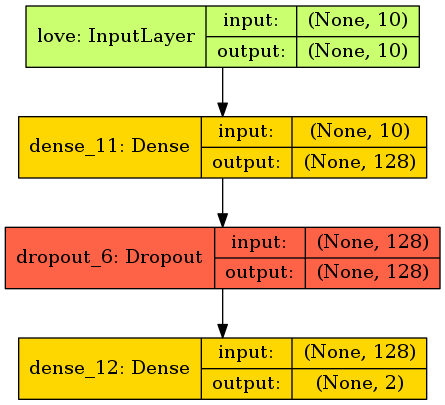

In [25]:
sys.argv = ['--dense_layers 2 25 25 25 25 26', '--inspect_show_labels']
args = parse_args()
model = make_dense_model(args, 10)
plot_dot_model_in_color(args, model_to_dot(model, show_shapes=args.inspect_show_labels), 'dense.png')
Image(filename='dense.png')